In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('emotions.csv')

# Inspect the first few rows
print(data.head())

# Separate features and target
X = data.drop(columns=['label'])  # Assuming 'label' is the target column
y = data['label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Handle missing values by imputing with the mean for numeric features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features (important for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Print all results
    print("\nFinal Results for All Models:")
    for model, metrics in results.items():
        print(f"\nModel: {model}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    return results

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


Model: Logistic Regression
Accuracy: 0.9742
Precision: 0.9741
Recall: 0.9736
F1 Score: 0.9737
Training Time (s): 0.8693

Model: Random Forest
Accuracy: 0.9836
Precision: 0.9834
Recall: 0.9833
F1 Score: 0.9833
Training Time (s): 5.4475

Model: Decision Tree
Accuracy: 0.9555
Precision: 0.9553
Recall: 0.9544
F1 Score: 0.9546
Training Time (s): 3.5782

Model: KNN
Accuracy: 0.9321
Precision: 0.9356
Recall: 0.9296
F1 Score: 0.9295
Training Time (s): 0.0050

Model: SVM
Accuracy: 0.9766
Precision: 0.9764
Recall: 0.9762
F1 Score: 0.9763
Training Time (s): 3.7634

Model: AdaBoost
Accuracy: 0.9110
Precision: 0.9159
Recall: 0.9085
F1 Score: 0.9088
Training Time (s): 66.3055

Model: Gaussian Naive Bayes
Accuracy: 0.6604
Precision: 0.6600
Recall: 0.6520
F1 Score: 0.6396
Training Time (s): 0.0551

Model: LightGBM
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Training Time (s): 45.6004

Model: XGBoost
Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9975
F1 Score: 0.9976
Training Time (s): 22.5579

Model: CatBoost
Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9975
F1 Score: 0.9976
Training Time (s): 987.5619


Here’s the complete code to train and evaluate 10 different models (LightGBM, XGBoost, CatBoost, Random Forest, Logistic Regression, KNN, Decision Trees, SVM, AdaBoost, and Gaussian Naive Bayes) on the entire data. The models are trained on X_train and y_train, evaluated on X_test and y_test, and the results (accuracy, precision, F1-score, recall, and training time) are printed for each model.

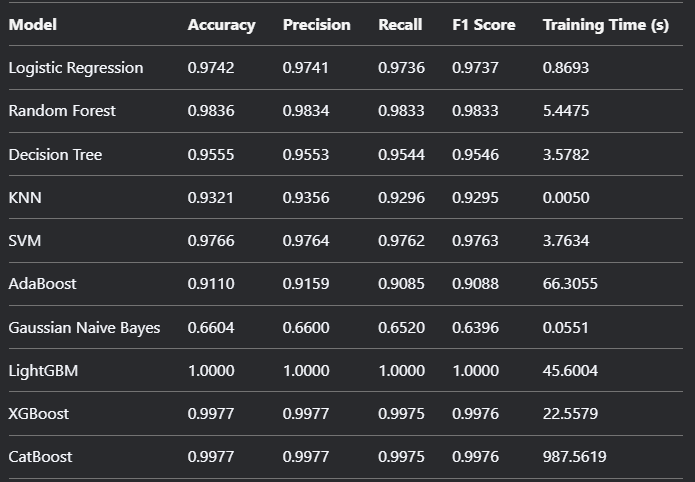

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time
from sklearn.linear_model import Lasso


# Load the dataset
data = pd.read_csv('emotions.csv')

# Separate features (X) and labels (y)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (NEGATIVE -> 0, NEUTRAL -> 1, POSITIVE -> 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check encoding mapping
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Apply LASSO for feature selection
alpha = 0.09  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

Label Encoding Mapping: {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
Selected 20 features: Index(['mean_4_a', 'max_q_1_a', 'max_q_3_a', 'min_0_a', 'min_q_7_a',
       'logm_8_a', 'logm_9_a', 'logm_42_a', 'logm_64_a', 'entropy0_a',
       'fft_136_a', 'fft_139_a', 'mean_4_b', 'max_q_3_b', 'max_q_13_b',
       'logm_8_b', 'logm_9_b', 'logm_42_b', 'logm_64_b', 'entropy0_b'],
      dtype='object')


In [12]:
# Subset the dataset with selected features
X = X_scaled[:, selected_features_indices]

# Split the feature-selected data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

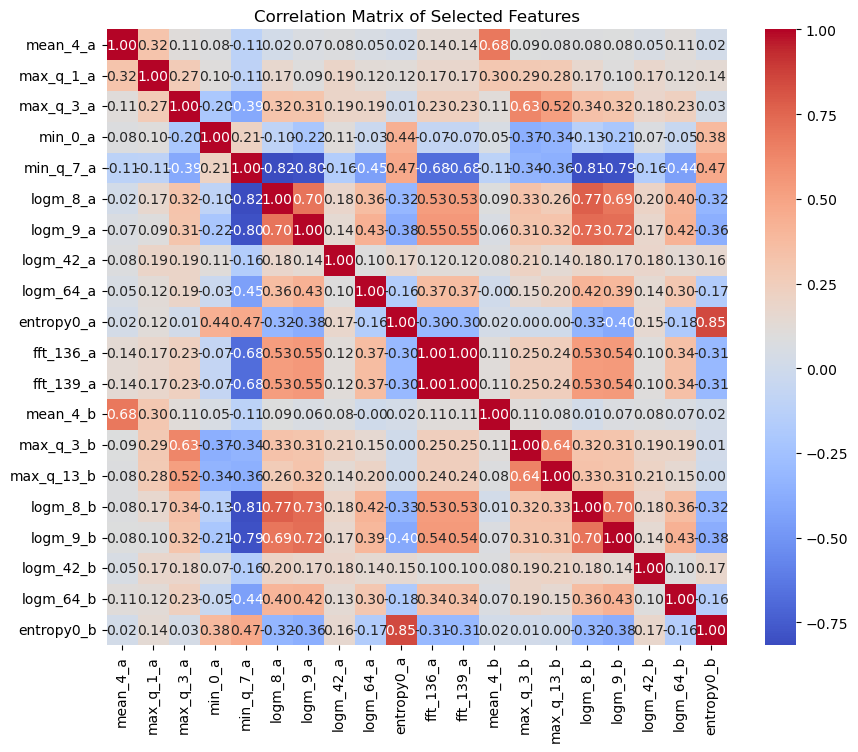

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for easier handling
X_selected_df = pd.DataFrame(X, columns=selected_features)

# Compute correlation matrix
corr_matrix = X_selected_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [4]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1705, 20)
Test set size: (427, 20)


In [ ]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Print all results
    print("\nFinal Results for All Models:")
    for model, metrics in results.items():
        print(f"\nModel: {model}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    return results

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


Model: Logistic Regression
Accuracy: 0.8923
Precision: 0.8948
Recall: 0.8908
F1 Score: 0.8907
Training Time (s): 0.0221

Model: Random Forest
Accuracy: 0.9742
Precision: 0.9742
Recall: 0.9738
F1 Score: 0.9738
Training Time (s): 0.5144

Model: Decision Tree
Accuracy: 0.9180
Precision: 0.9170
Recall: 0.9170
F1 Score: 0.9170
Training Time (s): 0.0382

Model: KNN
Accuracy: 0.9438
Precision: 0.9439
Recall: 0.9435
F1 Score: 0.9431
Training Time (s): 0.0010

Model: SVM
Accuracy: 0.8993
Precision: 0.9074
Recall: 0.8962
F1 Score: 0.8960
Training Time (s): 0.1905

Model: AdaBoost
Accuracy: 0.6581
Precision: 0.5333
Recall: 0.6437
F1 Score: 0.5459
Training Time (s): 0.4967

Model: Gaussian Naive Bayes
Accuracy: 0.8314
Precision: 0.8476
Recall: 0.8320
F1 Score: 0.8302
Training Time (s): 0.0000

Model: LightGBM
Accuracy: 0.9766
Precision: 0.9764
Recall: 0.9762
F1 Score: 0.9762
Training Time (s): 0.2872

Model: XGBoost
Accuracy: 0.9789
Precision: 0.9792
Recall: 0.9783
F1 Score: 0.9785
Training Time (s): 0.2013

Model: CatBoost
Accuracy: 0.9859
Precision: 0.9859
Recall: 0.9857
F1 Score: 0.9857
Training Time (s): 9.1728


Here’s the complete code to train and evaluate 10 different models (LightGBM, XGBoost, CatBoost, Random Forest, Logistic Regression, KNN, Decision Trees, SVM, AdaBoost, and Gaussian Naive Bayes) on the feature-selected data. The models are trained on X_train and y_train, evaluated on X_test and y_test, and the results (accuracy, precision, F1-score, recall, and training time) are printed for each model.

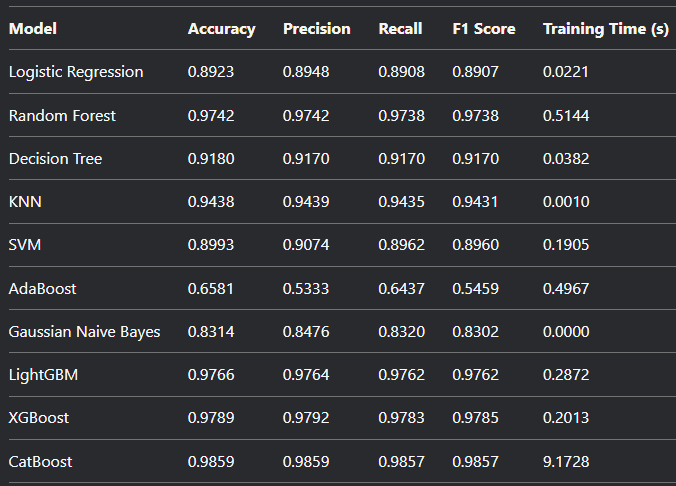

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time

# Load the dataset
data = pd.read_csv('emotion.csv')

# Separate features (X) and labels (y)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO for feature selection
alpha = 0.01  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

# Subset the dataset with selected features
X_selected = X_scaled[:, selected_features_indices]

# Split the feature-selected data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate models
def train_and_evaluate_model(model, param_grid, model_name):
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    # Perform GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    
    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {accuracy:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(conf_matrix)
    
    # Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Training time
    end_time = time.time()
    print(f"Total Training Time for {model_name}: {end_time - start_time:.2f} seconds")

# Define hyperparameter grids for each model
models = {
    "LightGBM": {
        "model": LGBMClassifier(),
        "param_grid": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [5, 10],
            'num_leaves': [31, 63]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "param_grid": {
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.5, 0.7]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "param_grid": {
            'iterations': [50, 100],
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {
            'C': [0.001, 0.01, 0.1, 1, 10, 75],
            'penalty': ['l1'],
            'solver': ['liblinear'],
            'max_iter': [100, 200, 300, 500]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            'n_neighbors': [1, 3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    "Decision Trees": {
        "model": DecisionTreeClassifier(),
        "param_grid": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2', None]
        }
    },
    "SVM": {
        "model": SVC(),
        "param_grid": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "GNB": {
        "model": GaussianNB(),
        "param_grid": {
            'priors': [None, [0.2, 0.3, 0.5], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]],
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
        }
    }
}

# Train and evaluate each model
for model_name, config in models.items():
    train_and_evaluate_model(config["model"], config["param_grid"], model_name)

KNN:
Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.9624633431085045
Training Time: 25.59 seconds
Cross-validation scores:
Fold-1: 0.9602, Fold-2: 0.9719, Fold-3: 0.9648, Fold-4: 0.9695, Fold-5: 0.9742
Average Accuracy: 0.9681
Average Precision: 0.9685
Average Recall: 0.9681
Average F1 Score: 0.9679

Logistic Regression:
Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy from Cross-Validation: 0.9782991202346041
Cross-Validation Results:
Fold-1: Accuracy=0.9836, Precision=0.9838, Recall=0.9836, F1-Score=0.9836
Fold-2: Accuracy=0.9649, Precision=0.9651, Recall=0.9649, F1-Score=0.9649
Fold-3: Accuracy=0.9695, Precision=0.9696, Recall=0.9695, F1-Score=0.9694
Fold-4: Accuracy=0.9859, Precision=0.9860, Recall=0.9859, F1-Score=0.9859
Fold-5: Accuracy=0.9859, Precision=0.9865, Recall=0.9859, F1-Score=0.9859
Final Cross-Validation Results:
Avg Accuracy: 0.9780
Avg Precision: 0.9782
Avg Recall: 0.9780
Avg F1-Score: 0.9780
Total Training Time: 35.82 seconds


SVM
Cross-Validation Results:
Fold-1: Accuracy=0.9836, Precision=0.9838, Recall=0.9836, F1-Score=0.9837
Fold-2: Accuracy=0.9742, Precision=0.9743, Recall=0.9742, F1-Score=0.9743
Fold-3: Accuracy=0.9648, Precision=0.9650, Recall=0.9648, F1-Score=0.9648
Fold-4: Accuracy=0.9695, Precision=0.9703, Recall=0.9695, F1-Score=0.9696
Fold-5: Accuracy=0.9883, Precision=0.9882, Recall=0.9883, F1-Score=0.9882

Final Cross-Validation Results:
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Avg Accuracy: 0.9761
Avg Precision: 0.9763
Avg Recall: 0.9761
Avg F1-Score: 0.9761
Total Training Time: 307.51 seconds

Decision Tree Classifier
Cross-Validation Results:
Fold-1: Accuracy=0.9672, Precision=0.9680, Recall=0.9672, F1-Score=0.9673
Fold-2: Accuracy=0.9625, Precision=0.9627, Recall=0.9625, F1-Score=0.9624
Fold-3: Accuracy=0.9671, Precision=0.9674, Recall=0.9671, F1-Score=0.9672
Fold-4: Accuracy=0.9718, Precision=0.9719, Recall=0.9718, F1-Score=0.9718
Fold-5: Accuracy=0.9789, Precision=0.9790, Recall=0.9789, F1-Score=0.9788
Final Cross-Validation Results:
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Avg Accuracy: 0.9695
Avg Precision: 0.9698
Avg Recall: 0.9695
Avg F1-Score: 0.9695
Total Training Time: 340.54 seconds


GNB
Cross-Validation Results:
Fold-1: Accuracy=0.6604, Precision=0.6633, Recall=0.6604, F1-Score=0.6452
Fold-2: Accuracy=0.6815, Precision=0.6734, Recall=0.6815, F1-Score=0.6588
Fold-3: Accuracy=0.6385, Precision=0.6489, Recall=0.6385, F1-Score=0.6241
Fold-4: Accuracy=0.6761, Precision=0.6726, Recall=0.6761, F1-Score=0.6547
Fold-5: Accuracy=0.6526, Precision=0.6586, Recall=0.6526, F1-Score=0.6355
Final Cross-Validation Results:
Best Hyperparameters: {'priors': [0.1, 0.1, 0.8], 'var_smoothing': 1e-05}
Avg Accuracy: 0.6618
Avg Precision: 0.6633
Avg Recall: 0.6618
Avg F1-Score: 0.6436
Total Training Time: 12.30 seconds


Random Forest
Cross-Validation Results:
Fold-1: Accuracy=0.9883, Precision=0.9884, Recall=0.9883, F1-Score=0.9883
Fold-2: Accuracy=0.9766, Precision=0.9767, Recall=0.9766, F1-Score=0.9766
Fold-3: Accuracy=0.9718, Precision=0.9718, Recall=0.9718, F1-Score=0.9718
Fold-4: Accuracy=0.9906, Precision=0.9907, Recall=0.9906, F1-Score=0.9906
Fold-5: Accuracy=0.9977, Precision=0.9977, Recall=0.9977, F1-Score=0.9977
Final Cross-Validation Results:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Avg Accuracy: 0.9850
Avg Precision: 0.9851
Avg Recall: 0.9850
Avg F1-Score: 0.9850
Total Training Time: 1586.15 seconds

AdaBoost
Cross-Validation Results:
Fold-1: Accuracy=0.9859, Precision=0.9861, Recall=0.9859, F1-Score=0.9860
Fold-2: Accuracy=0.9649, Precision=0.9649, Recall=0.9649, F1-Score=0.9648
Fold-3: Accuracy=0.9718, Precision=0.9729, Recall=0.9718, F1-Score=0.9720
Fold-4: Accuracy=0.9601, Precision=0.9611, Recall=0.9601, F1-Score=0.9603
Fold-5: Accuracy=0.9812, Precision=0.9815, Recall=0.9812, F1-Score=0.9812

Final Cross-Validation Results:
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 100}
Avg Accuracy: 0.9728
Avg Precision: 0.9733
Avg Recall: 0.9728
Avg F1-Score: 0.9729
Total Training Time: 2421.40 seconds



| Model               | Fold-1  | Fold-2  | Fold-3  | Fold-4  | Fold-5  | Avg Accuracy | Avg Precision | Avg Recall | Avg F1 Score | Training Time (s) | Best Hyperparameters |
|---------------------|---------|---------|---------|---------|---------|--------------|---------------|------------|--------------|------------------|----------------------|
| KNN                | 0.9602  | 0.9719  | 0.9648  | 0.9695  | 0.9742  | 0.9681       | 0.9685        | 0.9681     | 0.9679       | 25.59            | {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} |
| Logistic Regression | 0.9836  | 0.9649  | 0.9695  | 0.9859  | 0.9859  | 0.9780       | 0.9782        | 0.9780     | 0.9780       | 35.82            | {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'} |
| SVM                | 0.9836  | 0.9742  | 0.9648  | 0.9695  | 0.9883  | 0.9761       | 0.9763        | 0.9761     | 0.9761       | 307.51           | {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} |
| Decision Tree      | 0.9672  | 0.9625  | 0.9671  | 0.9718  | 0.9789  | 0.9695       | 0.9698        | 0.9695     | 0.9695       | 340.54           | {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} |
| Gaussian NB        | 0.6604  | 0.6815  | 0.6385  | 0.6761  | 0.6526  | 0.6618       | 0.6633        | 0.6618     | 0.6436       | 12.30            | {'priors': [0.1, 0.1, 0.8], 'var_smoothing': 1e-05} |
| Random Forest      | 0.9883  | 0.9766  | 0.9718  | 0.9906  | 0.9977  | 0.9850       | 0.9851        | 0.9850     | 0.9850       | 1586.15          | {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} |
| AdaBoost           | 0.9859  | 0.9649  | 0.9718  | 0.9601  | 0.9812  | 0.9728       | 0.9733        | 0.9728     | 0.9729       | 2421.40          | {'learning_rate': 1.0, 'n_estimators': 100} |



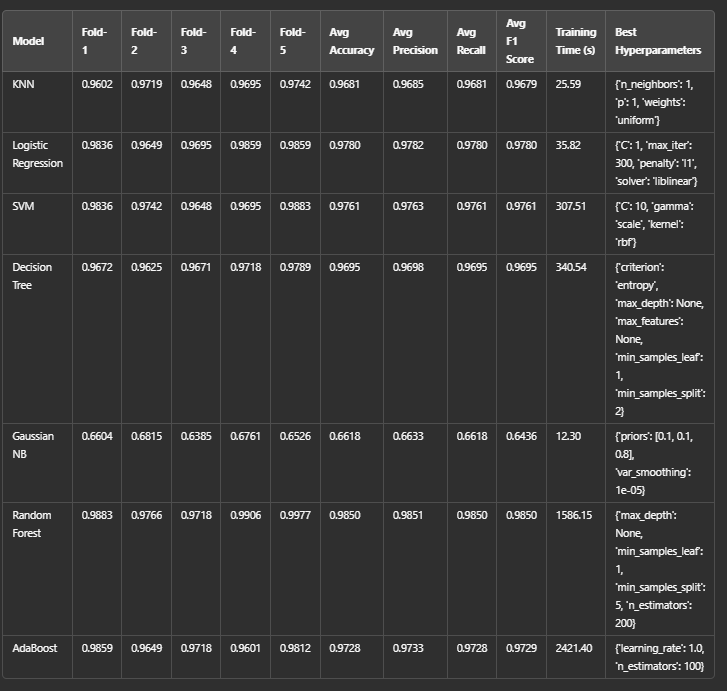